In [3]:
import pandas as pd
!pip install pandas openpyxl xlrd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import timedelta 


In [4]:
dados = "Sample - Superstore.xls"
log = pd.read_excel(dados)

In [132]:
#print(log)

Pergunta 1:

In [5]:
filtro_categoria = log[log['Category'] == 'Office Supplies']

In [64]:
#print(filtro_categoria)

In [6]:
vendas_por_cidade = filtro_categoria.groupby('City')['Sales'].sum()
#print(vendas_por_cidade)

In [7]:
cidade_maior_venda = vendas_por_cidade.idxmax()
print(cidade_maior_venda)

New York City


Pergunta 2:

In [8]:
vendas_por_dia = log.groupby('Ship Date')['Sales'].sum()
#print(vendas_por_dia.index.dtype)
#print(vendas_por_dia)

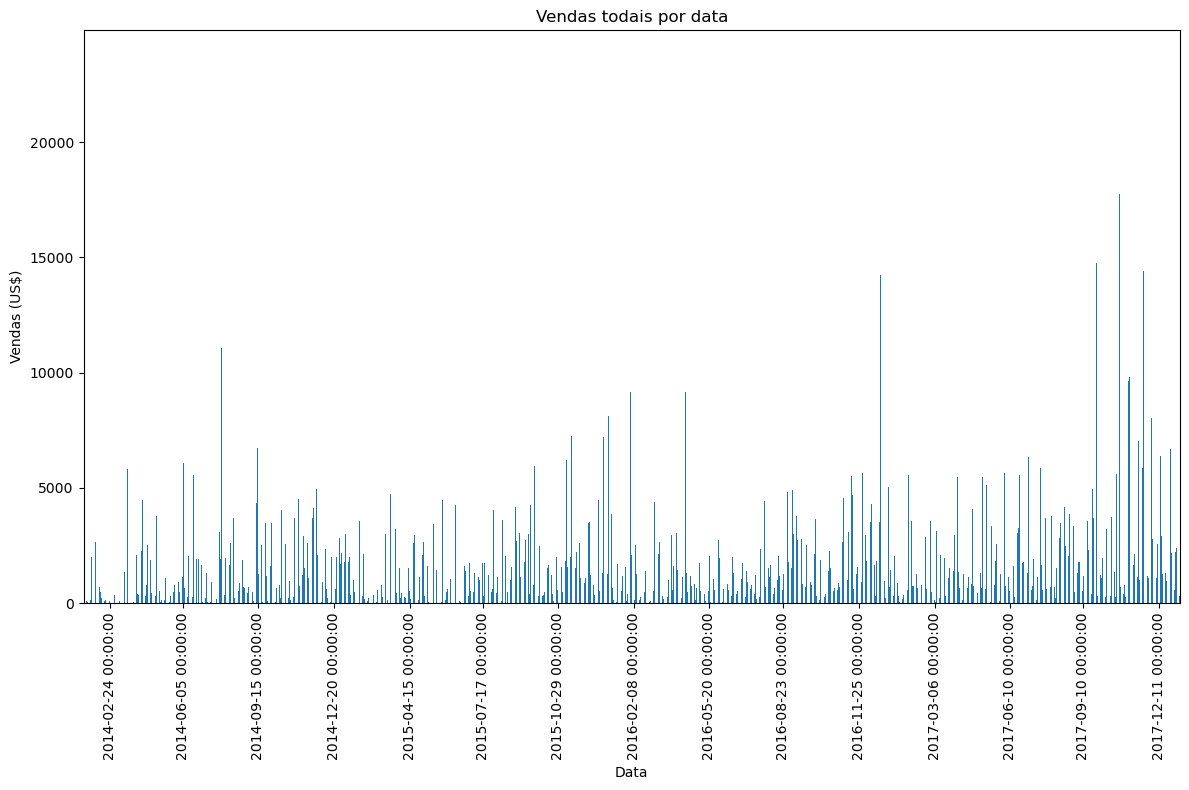

In [9]:
plt.figure()
graf = vendas_por_dia.plot(
    kind = 'bar',
    title = 'Vendas todais por data',
    xlabel = 'Data',
    ylabel =  'Vendas (US$)',
    figsize = (12,8)
)
graf.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
#graf.xaxis.set_major_locator(mdates.YearLocator())
#graf.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#graf.xaxis.set_minor_locator(mdates.MonthLocator(interval=3)) 
#graf.set_ylim(0,15000)
#graf.set_xlim(2014,2018)
plt.tight_layout()
plt.show()

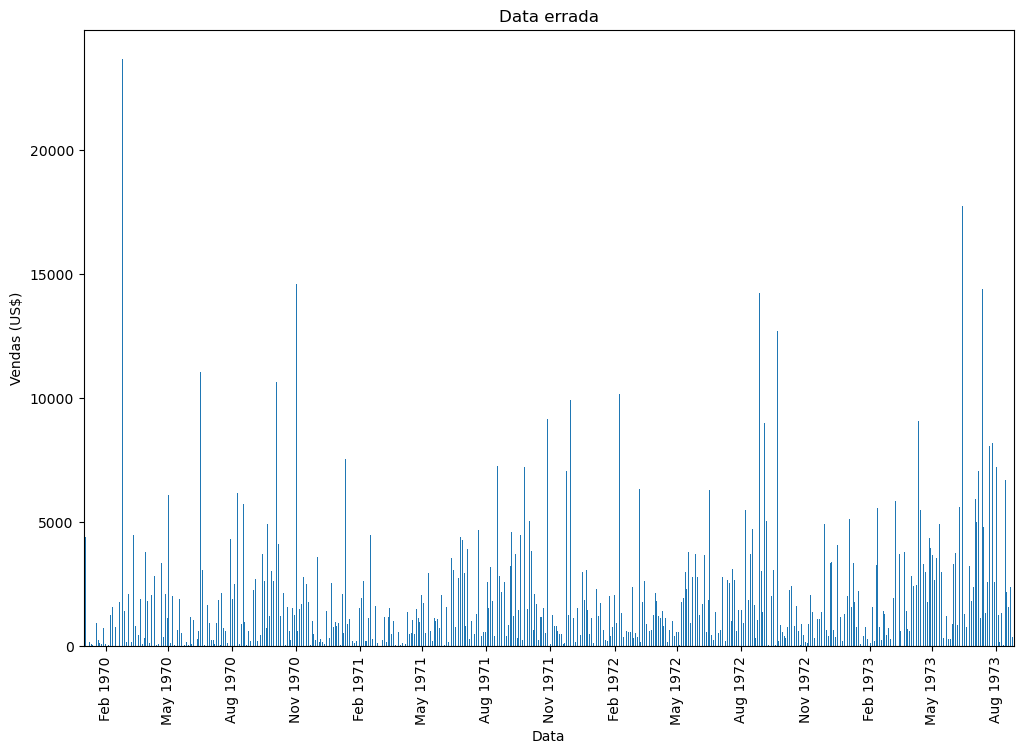

datetime64[ns]


In [37]:
#Nao consigo formatar os ticks do eixo x :(
plt.figure()
graf = vendas_por_dia.plot(
    kind = 'bar',
    title = 'Data errada',
    xlabel = 'Data',
    ylabel =  'Vendas (US$)',
    figsize = (12,8)
)
graf.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
graf.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()
#data type correto
print(vendas_por_dia.index.dtype)

Pergunta 3:

In [10]:
vendas_por_estado = log.groupby('State')['Sales'].sum()
vendas_por_estado = vendas_por_estado.sort_values(ascending=False)
#print(vendas_por_estado)

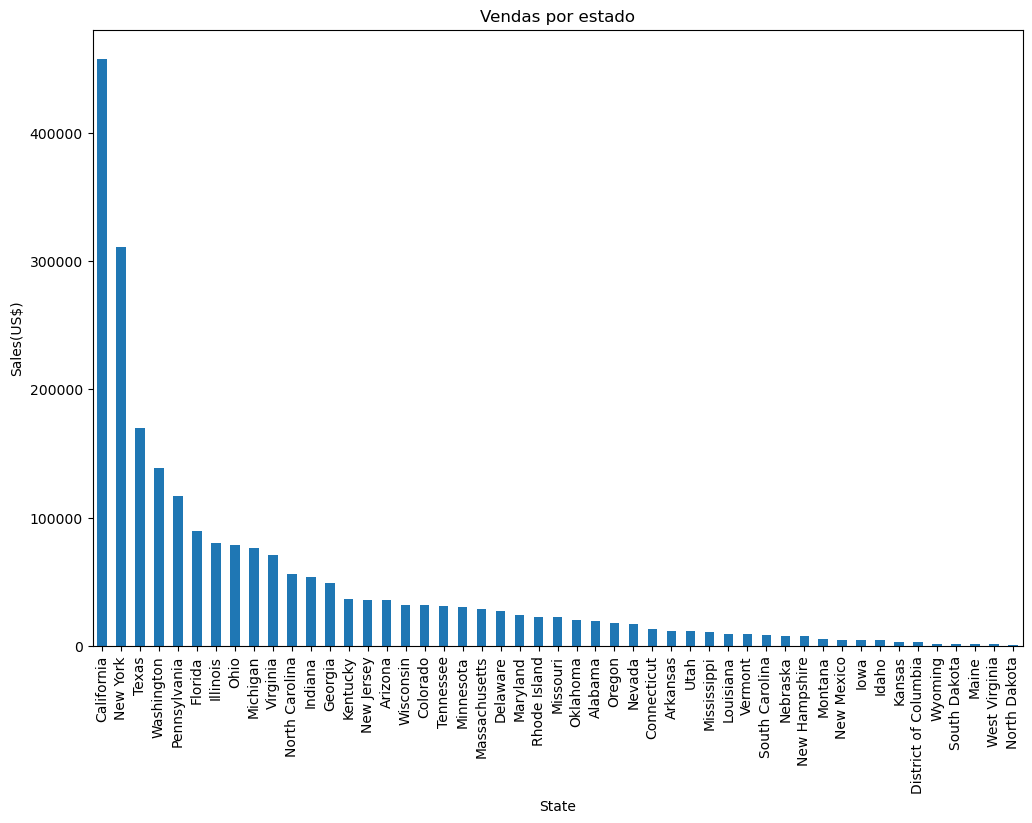

In [11]:
plt.figure()
vendas_por_estado.plot(kind='bar',
                       title='Vendas por estado',
                       xlabel='State',
                       ylabel='Sales(US$)',
                       figsize=(12,8) 
)
plt.show()

Pergunta 4:

In [12]:
vendas_por_cidade = log.groupby('City')['Sales'].sum()
#print(vendas_por_cidade)

In [13]:
vendas_por_cidade_maiores = vendas_por_cidade.sort_values(ascending=False)
#print(vendas_por_cidade_maiores)

In [14]:
vendas_por_cidade_maiores = vendas_por_cidade_maiores.iloc[:10]
#print(vendas_por_cidade_maiores)

<Axes: title={'center': 'Vendas por cidade'}, xlabel='Cidade', ylabel='Vendas (US$)'>

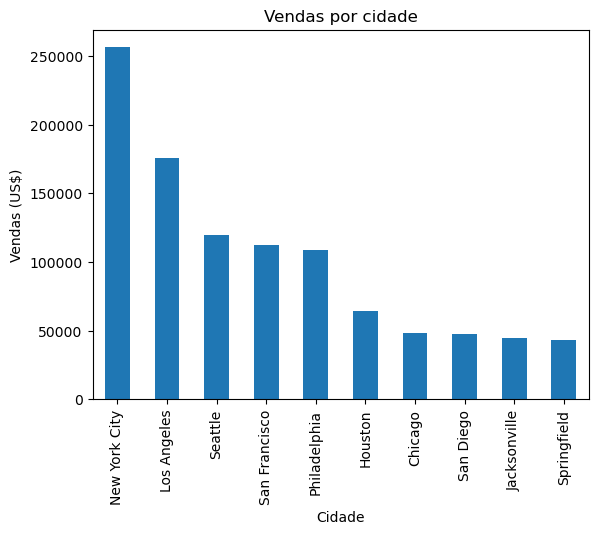

In [15]:
vendas_por_cidade_maiores.plot(kind='bar', xlabel = 'Cidade', ylabel = 'Vendas (US$)', title='Vendas por cidade')

Pergunta 5

In [16]:
vendas_segmentos = log.groupby('Segment')['Sales'].sum()
#print(vendas_segmentos)

<Axes: title={'center': 'Vendas por segmento'}, ylabel='Sales'>

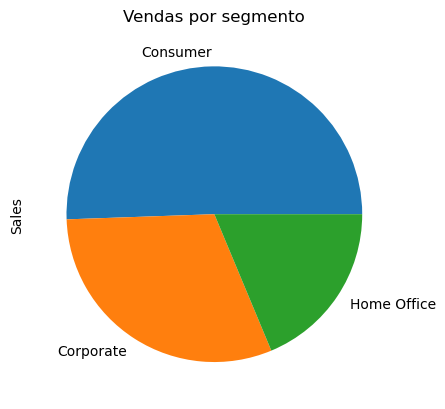

In [17]:
vendas_segmentos.plot(kind = 'pie', title='Vendas por segmento')

In [18]:
max_segmento = vendas_segmentos.idxmax()
print(max_segmento)

Consumer


Pergunta 6

In [19]:
log['Ship Date'] = pd.to_datetime(log['Ship Date'], format='%d/%m/%Y')
log['Ano'] = log['Ship Date'].dt.year
log['Mes'] = log['Ship Date'].dt.month
#print(log)

In [20]:
segmento_ano = log.groupby(['Ano','Segment'])['Sales'].sum()
print(segmento_ano)

Ano   Segment    
2014  Consumer       263436.4766
      Corporate      120263.0307
      Home Office     86683.6858
2015  Consumer       265223.0893
      Corporate      135960.6899
      Home Office     78258.7228
2016  Consumer       299009.2432
      Corporate      207068.5008
      Home Office    105248.0090
2017  Consumer       330095.9991
      Corporate      241633.4494
      Home Office    159160.2669
2018  Consumer         3636.5368
      Corporate        1220.6960
      Home Office       302.4640
Name: Sales, dtype: float64


In [21]:
vendas_maior = log[log['Sales'] > 1000]
#print(vendas_maior)


In [22]:
num_vendas_maior = len(vendas_maior)
print(num_vendas_maior)

468


In [23]:
media_antes = log['Sales'].mean()
print(media_antes)

229.85800083049833


In [24]:
log_com_desconto = log['Sales'].apply(lambda x: 0.85 * x if x > 1000 else 0.90 * x)
#print(log_com_desconto)

In [25]:
media_depois = log_com_desconto.mean()
print(media_depois)

201.91838305883533


Pergunta 9

<Axes: title={'center': 'Vendas por segmento por ano'}, xlabel='Ano', ylabel='Vendas (US$)'>

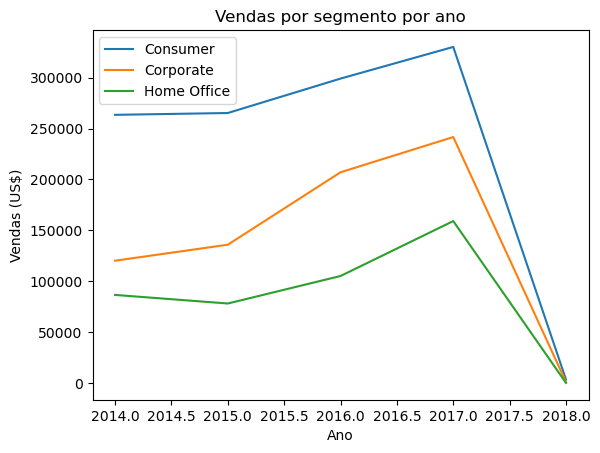

In [27]:
filtro_consumer = log[log['Segment'] == 'Consumer']
filtro_corporate = log[log['Segment'] == 'Corporate']
filtro_homeOffice = log[log['Segment'] == 'Home Office']
vendas_consumer = filtro_consumer.groupby('Ano')['Sales'].sum()
vendas_corporate = filtro_corporate.groupby('Ano')['Sales'].sum()
vendas_homeOffice = filtro_homeOffice.groupby('Ano')['Sales'].sum()
vendas = {
    'Consumer': vendas_consumer,
    'Corporate': vendas_corporate,
    'Home Office': vendas_homeOffice
}
df_vendas = pd.DataFrame(vendas)
#print(df_vendas.index.dtype)

df_vendas.plot(title='Vendas por segmento por ano', xlabel='Ano', ylabel='Vendas (US$)')


<Axes: title={'center': 'Vendas por segmento po mes'}, xlabel='Mes', ylabel='Vendas (US$)'>

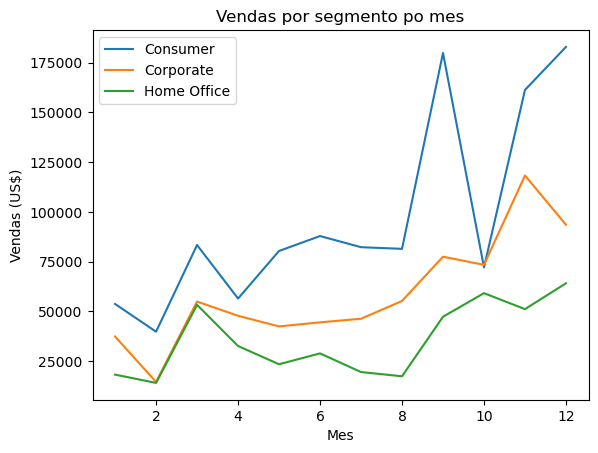

In [28]:

vendas_consumer = filtro_consumer.groupby('Mes')['Sales'].sum()
vendas_corporate = filtro_corporate.groupby('Mes')['Sales'].sum()
vendas_homeOffice = filtro_homeOffice.groupby('Mes')['Sales'].sum()
vendas = {
    'Consumer': vendas_consumer,
    'Corporate': vendas_corporate,
    'Home Office': vendas_homeOffice
}
df_vendas = pd.DataFrame(vendas)
df_vendas.plot(title='Vendas por segmento po mes', xlabel='Mes', ylabel='Vendas (US$)')

In [29]:
rank_subcat = log.groupby(['Sub-Category'])['Sales'].sum()
#print(rank_subcat)

In [30]:
rank_subcat = rank_subcat.sort_values(ascending = False)
#print(rank_subcat)

In [31]:
rank_subcat = rank_subcat.iloc[:12]
#print(rank_subcat)

In [33]:
rank_subcat_idx = rank_subcat.index.tolist()
#print(rank_subcat_idx)

In [34]:
filtro_rsc = log['Sub-Category'].isin(rank_subcat_idx)
log_filtrado = log[filtro_rsc]
#print(df_filtrado)

<Axes: title={'center': 'Vendas por categoria e sub-categoria'}, xlabel='Tipo', ylabel='Vendas (US$)'>

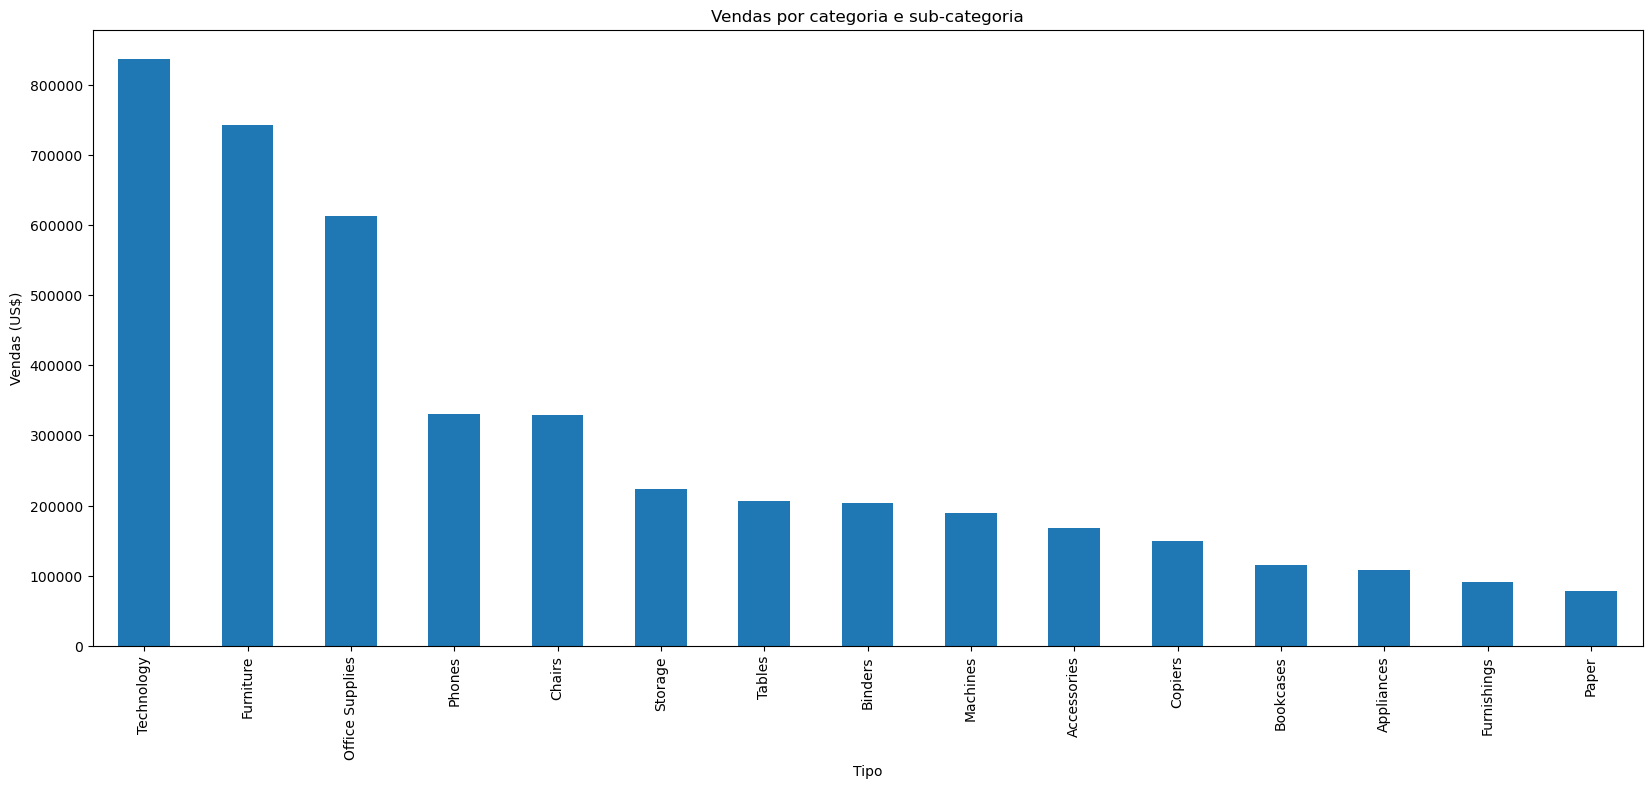

In [35]:
df_cat = log_filtrado.groupby('Category')['Sales'].sum()
df_subcat = log_filtrado.groupby('Sub-Category')['Sales'].sum()
#print(df_cat)
#print(df_subcat)
df_final = pd.concat([df_cat,df_subcat])
df_final = df_final.sort_values(ascending=False)
#print(df_final)
df_final.plot(kind='bar', title='Vendas por categoria e sub-categoria', xlabel='Tipo', ylabel='Vendas (US$)', figsize=(20,8))